# Pytorch
## 加载数据
dataset -> dataloader

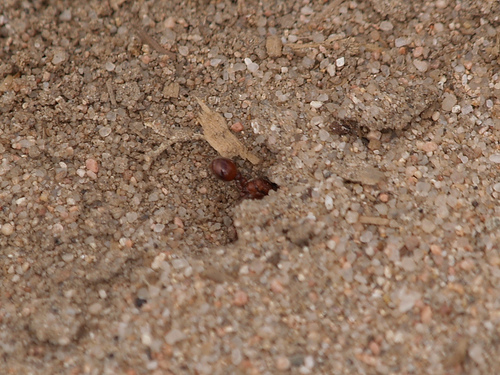

In [1]:
from torch.utils.data import Dataset
from PIL import Image
import os

class my_data(Dataset):

    def __init__(self, root_dir, label_dir) -> None:
        super().__init__()
        self.root_dir = root_dir
        self.label_dir = label_dir
        self.path = os.path.join(self.root_dir, self.label_dir)
        self.img_path = os.listdir(self.path)
    
    def __getitem__(self, index):
        img_name = self.img_path[index]
        img_item_path = os.path.join(self.root_dir, self.label_dir, img_name)
        img = Image.open(img_item_path)
        label = self.label_dir
        return img, label
    
    def __len__(self):
        return len(self.img_path)

root_dir = '/Users/chen/Desktop/练手数据集/train'
ants_image_dir = 'ants_image'
ants_dataset = my_data(root_dir, ants_image_dir)

img, label = ants_dataset[0]
img

# len(ants_dataset)

## Tensorboard and Transform

### 使用tensorboard
### 使用transform转换成tensor数据格式

In [2]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from PIL import Image


writer = SummaryWriter('/Users/chen/Desktop/练手数据集/train/logs')
image_path = ('/Users/chen/Desktop/练手数据集/train/ants_image/0013035.jpg')
image_PIL = Image.open(image_path)
img_array = np.array(image_PIL)

writer.add_image('test', img_array, 2,dataformats="HWC")
# for i in range(100):

#     writer.add_scalar('y=x',3*i,i)  #tag, scalar_value(y), global_step(x)


writer.close()

In [4]:
# 使用tensorboard
# 使用transform转换成tensor数据格式
from PIL import Image
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms

img_path = '/Users/chen/Desktop/练手数据集/train/ants_image/5650366_e22b7e1065.jpg'
img = Image.open(img_path)

writer = SummaryWriter('/Users/chen/Desktop/练手数据集/train/logs')

tensor_trans = transforms.ToTensor()
ten_img = tensor_trans(img)

writer.add_image('test',ten_img)

writer.close()

In [ ]:
from torchvision import transforms
from PIL import Image

img = Image.open('/Users/chen/Desktop/练手数据集/train/ants_image/6240329_72c01e663e.jpg')

